#### 二叉树重构

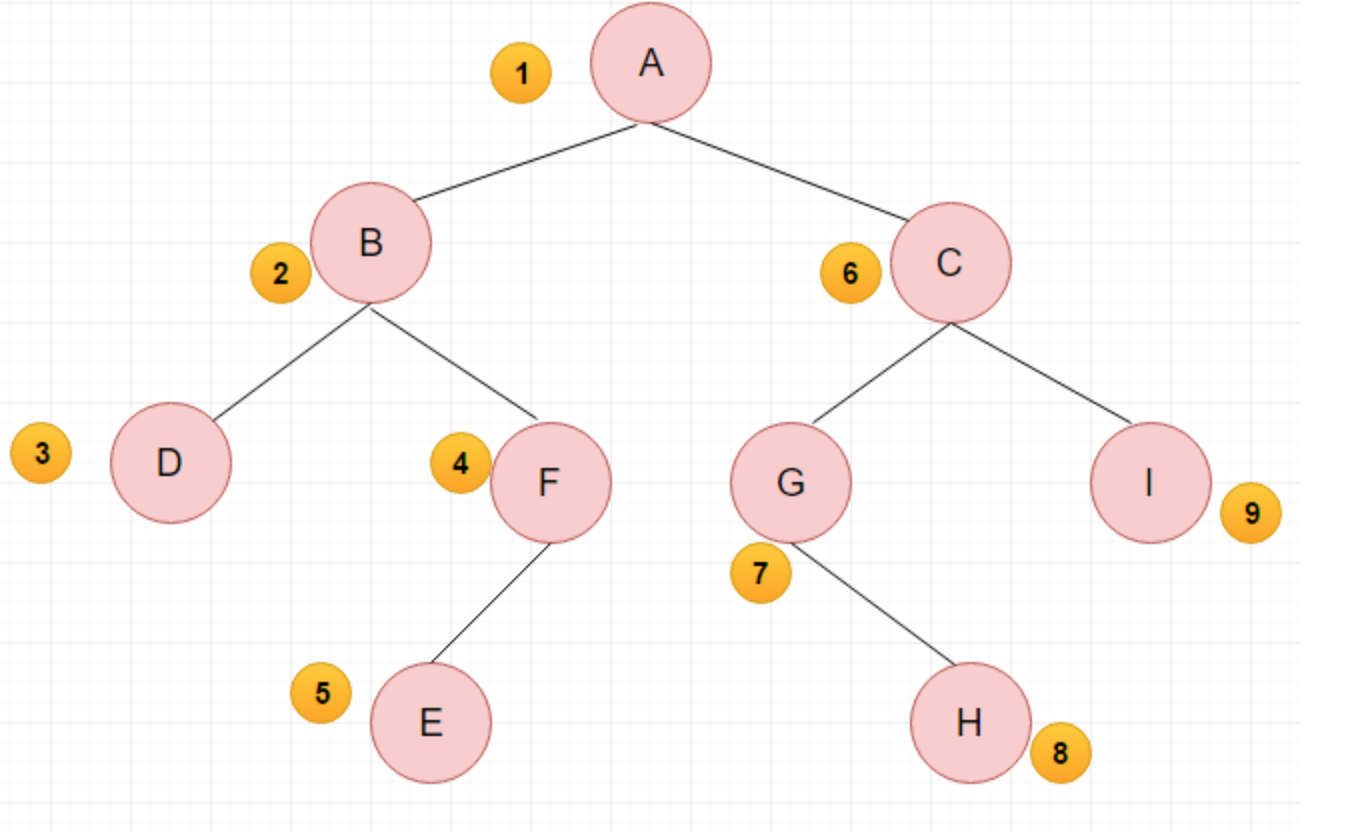

前序遍历：A BDFE CGHI
中序遍历：DBEF    A    GHCI


In [ ]:
```
题目：
输入某二叉树的前序遍历和中序遍历的结果，请重建出该二叉树。假设输入的前序遍历和中序遍历的结果中都不含重复的数字。例如输入前序遍历序列{1,2,4,7,3,5,6,8}和中序遍历序列{4,7,2,1,5,3,8,6}，则重建二叉树并返回。

解析：
知道前序和中序遍历的结果是可以唯一确定一颗二叉树的，但是知道前序和后序遍历是不可以唯一确定一颗二叉树的。

利用前序遍历第一个数字为根，用这个根在中序遍历中查找，左边的就是左子树，右边的就是右子树，算出左右子树的长度，用其长度在前序遍历中划分出左右子树，重复上述过程，就可以重建这颗二叉树了。
‘''
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


class S4:
    def reConstructBinaryTree(self, pre, tin):
        if not pre or not tin:
            return None
        return resConstructTree(pre, 0, len(pre) - 1, tin, 0, len(tin) - 1)


def resConstructTree(pre, startPre, endPre, tin, startTin, endTin):
    if startPre > endPre or startTin > endTin:
        return None

    # 根节点
    root = TreeNode(pre[startPre])

    # 确定根节点在中序遍历中的位置
    rootIndex = -1
    for k, v in enumerate(tin):
        if v == root.val:
            rootIndex = k

    # 确定左右子树的节点个数
    leftNodeCount = rootIndex - startTin
    rightNodeCount = endTin - rootIndex

    # 递归确认左右子树
    root.left = resConstructTree(pre, startPre + 1, startPre + leftNodeCount, tin, startTin, rootIndex - 1)
    root.right = resConstructTree(pre, startPre + leftNodeCount + 1, endPre, tin, rootIndex + 1, endTin)
    return root